In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

##Generate Dataset

In [2]:
data_points = 300
X, y = datasets.make_circles(n_samples=data_points, 
                             factor=0.2, 
                             random_state=5,
                             noise=0.1)


## Plot the generated dataset

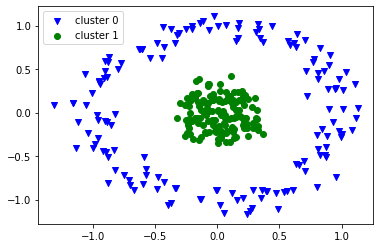

In [3]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c='green',
            marker='o',
            label='cluster 1')
plt.legend(loc='upper left')
plt.show()

## Create our model

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_one, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, hidden_one)
      self.hidden_layer_1 = nn.Linear(hidden_one, output_size)
    def forward(self, x):
      x = torch.sigmoid(self.linear(x))
      x = torch.sigmoid(self.hidden_layer_1(x))
      return x
    def predict(self, x):
      pred = self.forward(x)
      return np.where(pred<0.5, 0, 1)

## Define our model

In [5]:
torch.manual_seed(5)
model = Model(2, 4, 1)
print (model)
print (list(model.parameters()))

Model(
  (linear): Linear(in_features=2, out_features=4, bias=True)
  (hidden_layer_1): Linear(in_features=4, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.4670, -0.5288],
        [ 0.5762,  0.4524],
        [ 0.5941, -0.5421],
        [-0.4746,  0.3365]], requires_grad=True), Parameter containing:
tensor([-0.6601,  0.6989,  0.1505,  0.0913], requires_grad=True), Parameter containing:
tensor([[-0.4276,  0.1593,  0.2150,  0.0793]], requires_grad=True), Parameter containing:
tensor([0.4809], requires_grad=True)]


## Training in action

In [6]:
criterion = nn.BCELoss()
# Here we are using Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)

X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y).reshape(data_points, 1)
epochs = 200

for i in range(epochs):
  y_pred = model.forward(X_tensor)
  loss = criterion(y_pred, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

## Plot decision boundary

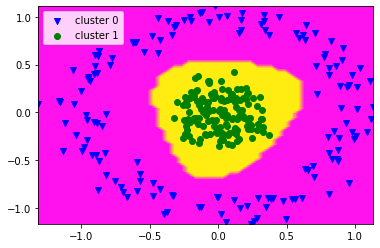

In [7]:
def plot_decision_boundary(X, y):
  # Plot the decision boundary
  # Determine grid range in x and y directions and plus some padding 
  # x_span (50, 1)
  x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
  y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))

  # XX (50, 50)
  XX, YY = np.meshgrid(x_span, y_span)

  # data (2500, 2)
  data = np.c_[XX.ravel(), YY.ravel()]

  # Pass data to predict method
  data_tensor = torch.FloatTensor(data)

  #output (2500, 1)
  output = model.predict(data_tensor)
  Z = output.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap='spring')
  
  plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

  plt.scatter(X[y == 1,0],
              X[y == 1,1],
              c='green',
              marker='o',
              label='cluster 1')
  plt.legend(loc='upper left')

plot_decision_boundary(X, y)
plt.show()


## New Predictions

Point A Red in the group: [1]
Point B Yellow in the group: [0]


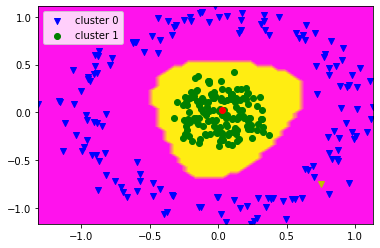

In [8]:
point_1 = torch.Tensor([0.025, 0.025])
point_2 = torch.Tensor([0.75, -0.75])

print ("Point A Red in the group:",  model.predict(point_1))
print ("Point B Yellow in the group:",  model.predict(point_2))

plt.plot(point_1.numpy()[0], point_1.numpy()[1], 'ro')
plt.plot(point_2.numpy()[0], point_2.numpy()[1], 'yv')
plot_decision_boundary(X, y)
plt.show()